# Resolución numérica de problemas de valor inicial
Los métodos implementados son los siguientes:
- Ecuaciones diferenciales.
    - Método de Euler: `euler`.
    - Método de Heun: `heun`.
    - Método de punto medio: `punto_medio`.
    - Método RK4: `rk4`.
    - Método de Taylor de orden 2: `taylor2`.
    - Método de Taylor de orden 3: `taylor3`.
    - Método AB2: `ab2`.
- Sistemas de ecuaciones diferenciales.
    - Método de Euler para sistemas: `euler_sistema`.
    - Método de Heun para sistemas: `heun_sistema`.
    - Método de punto medio para sistemas: `punto_medio_sistema`.
    - Método RK4 para sistemas: `rk4_sistema`.

In [1]:
from numpy import array, cos, exp, zeros
from matplotlib.pyplot import *

## Problemas propuestos

### Problema 1
Hallar la solución del problema de valor inicial
$$(P_1) \begin{cases}
y' = \frac{1}{2}(t^2 - y), & t \in [0, 10], \\
y(0) = 1,
\end{cases}$$
cuya solución exacta es la función
$$y(t) = t^2-4t+8-7e^{-t/2}.$$

In [2]:
def f(t, y):
    return (1/2)*(t**2 - y)

def exacta_p1(t):
    return t**2 - 4*t + 8 - 7*exp(-t/2)

### Problema 2
Hallar la solución del problema de valor inicial
$$(P_2) \begin{cases}
y'' + 20y' + 101y = 0, & t \in [0, 7], \\
y(0) = 1, \; y'(0) = -10,
\end{cases}$$
cuya solución exacta es la función
$$y(t) = e^{-10t}\cos(t).$$

El problema se puede reescribir como un sistema de ecuaciones:
$$(P_2) \begin{cases}
x' = y, \\
y' = -101x - 20y, & t \in [0, 7], \\
x(0) = 1, \; y(0) = -10.
\end{cases}$$

In [3]:
def g(t, z):
    x, y = z[0], z[1]
    return array([y, -101*x - 20*y])

def exacta_p2(t):
    return exp(-10*t)*cos(t)

## Método de Euler
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Euler se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + hf(t_k, y_k), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [4]:
def euler(a, b, f, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0

    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h*f(t[k], y[k])
    
    return t, y

Aplicamos el método de Euler al problema $(P_1)$ con $N = 50$.

Error: 0.38684928737465896


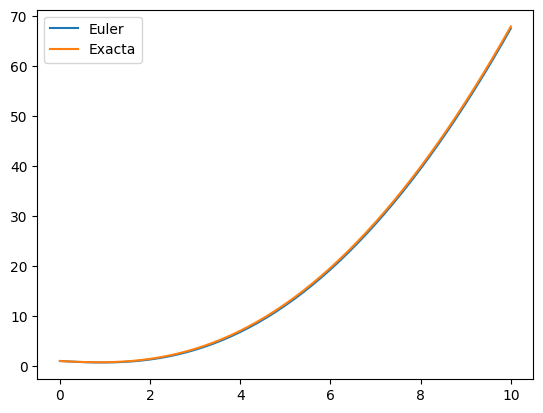

In [5]:
t, y = euler(0, 10, f, 50, 1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Euler", "Exacta"])
show()

## Método de Heun
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Heun se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + \frac{h}{2}(f(t_k, y_k) + f(t_{k+1}, y_k + hf(t_k, y_k))), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [6]:
def heun(a, b, f, N, y0):    
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0

    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h/2 * (f(t[k], y[k]) + f(t[k+1], y[k] + h*f(t[k], y[k])))
    
    return t, y

Aplicamos el método de Heun al problema $(P_1)$ con $N = 50$.

Error: 0.02048389125583583


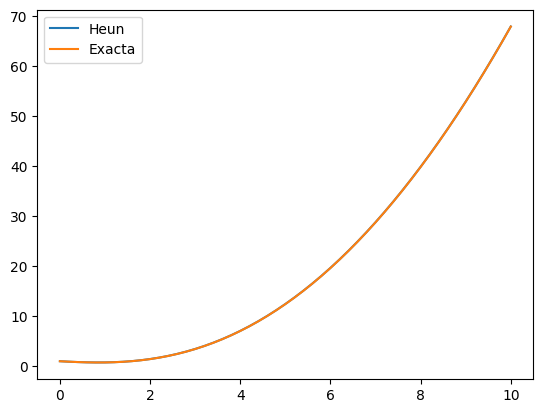

In [7]:
t, y = heun(0, 10, f, 50, 1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Heun", "Exacta"])
show()

## Método del punto medio
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método del punto medio se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + hf\left(t_k + \frac{h}{2}, y_k + \frac{h}{2}f(t_k, y_k)\right), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [8]:
def punto_medio(a, b, f, N, y0):    
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0

    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h * f(t[k] + h/2, y[k] + h/2 * f(t[k], y[k]))
    
    return t, y

Aplicamos el método del punto medio al problema $(P_1)$ con $N = 50$.

Error: 0.010029141237438921


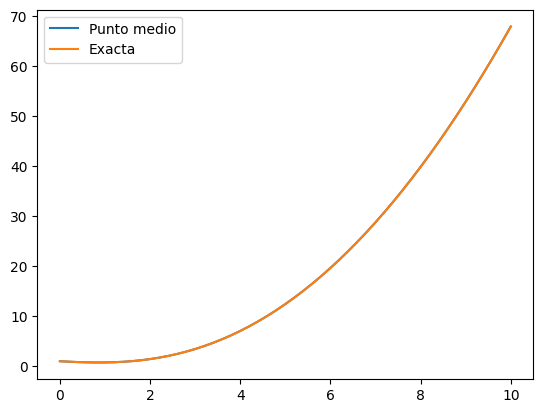

In [9]:
t, y = punto_medio(0, 10, f, 50, 1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Punto medio", "Exacta"])
show()

## Método RK4
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Runge-Kutta de cuarto orden se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + \frac{h}{6}\,(K_1 + 2\,K_2 + 2\,K_3 + K_4), & k = 0, 1, 2, \dots N-1,
\end{cases}$$
donde
\begin{align*}
K_1 & = f(t_k, y_k), \\
K_2 & = f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2}K_1\right), \\
K_3 & = f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2}K_2\right), \\
K_4 & = f(t_{k+1}, y_k + hK_3).
\end{align*}

In [10]:
def rk4(a, b, f, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a 
    y[0] = y0 

    for k in range(N):
        t[k+1] = t[k] + h
        k1 = f(t[k], y[k])
        k2 = f(t[k] + h/2, y[k] + h/2 * k1)
        k3 = f(t[k] + h/2, y[k] + h/2 * k2)
        k4 = f(t[k+1], y[k] + h*k3)
        y[k+1] = y[k] + h/6 *(k1 + 2*k2 + 2*k3 + k4)
    
    return t, y

Aplicamos el método RK4 al problema $(P_1)$ con $N = 50$.

Error: 8.484323060997667e-06


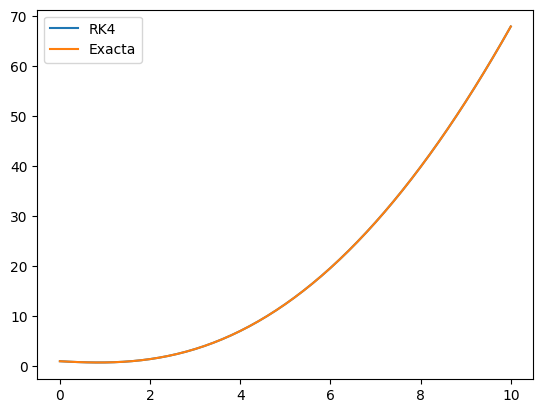

In [11]:
t, y = rk4(0, 10, f, 50, 1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["RK4", "Exacta"])
show()

## Método de Taylor de orden 2
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Taylor de orden 2 se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + hf(t_k, y_k) + \frac{h^2}{2}\frac{df}{dt}(t_k, y_k), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [12]:
def taylor2(a, b, f, df, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0
    
    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h*f(t[k], y[k]) + h**2/2*df(t[k], y[k])
        
    return t, y

Aplicamos el método de Taylor de orden 2 al problema $(P_1)$ con $N = 50$.
La derivada de $ft, y = \frac{1}{2}(t^2 - y)$ con respecto a $t$ es
$$\frac{df}{dt} = t - \frac{1}{2}y'(t) = t - \frac{1}{2}f(t, y).$$

Error: 0.0046308056347657


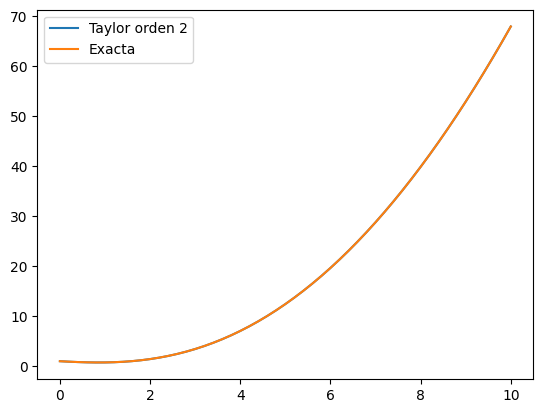

In [13]:
def df(t, y):
    return t - 1/2 * f(t, y)

t, y = taylor2(0, 10, f, df, 50, 1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Taylor orden 2", "Exacta"])
show()

## Método de Taylor de orden 3
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Taylor de orden 3 se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + hf(t_k, y_k) + \frac{h^2}{2}\frac{df}{dt}(t_k, y_k) + \frac{h^3}{6}\frac{d^2f}{dt^2}(t_k, y_k), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [14]:
def taylor3(a, b, f, d1f, d2f, N, y0):
    h = (b-a)/N
    t = zeros(N+1)
    y = zeros(N+1)
    t[0] = a
    y[0] = y0
    
    for k in range(N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h*f(t[k], y[k]) + h**2/2*d1f(t[k], y[k]) + h**3/6*d2f(t[k], y[k])
        
    return t, y

Aplicamos el método de Taylor de orden 3 al problema $(P_1)$ con $N = 50$.
Las derivadas primera y segunda de $ft, y = \frac{1}{2}(t^2 - y)$ con respecto a $t$ son
\begin{align*}
    \frac{df}{dt}(t, y) & = t - \frac{1}{2}y'(t) = t - \frac{1}{2}f(t, y), \\
    \frac{d^2f}{dt^2}(t, y) &= 1 - \frac{1}{2}\frac{df}{dt}(t, y).
\end{align*}

Error: 0.00011624776946805859


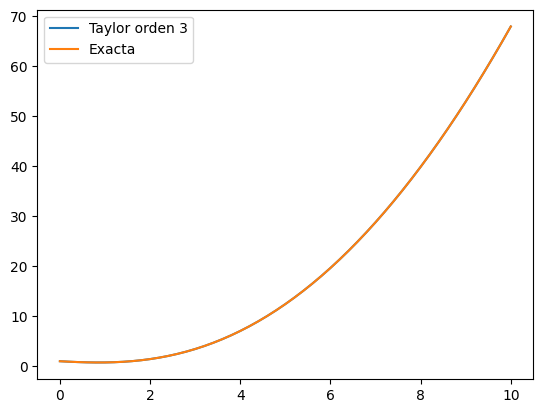

In [15]:
def df1(t, y):
    return t - 1/2 * f(t, y)

def df2(t, y):
    return 1 - 1/2 * df1(t, y)

t, y = taylor3(0, 10, f, df1, df2, 50, 1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Taylor orden 3", "Exacta"])
show()

## Método AB2
Sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R} \to \mathbb{R}$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
y' = f(t, y), & t \in [a, b], \\
y(0) = y_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Adams-Bashforth de profundidad 2 se define como
$$\begin{cases}
y_0 = y(0), \\
y_{k+1} = y_k + \frac{h}{2}(3f_k - f_{k-1}), & k = 0, 1, 2, \dots N-1, \\
\end{cases}$$
donde $f_k = f(t_k, y_k)$.

In [16]:
def ab2(a, b, fun, N, y0):
    h = (b-a)/N 
    t = zeros(N+1)
    y = zeros(N+1)
    f = zeros(N+1)

    t[0] = a
    y[0] = y0
    f[0] = fun(a, y[0])

    t[1] = a + h
    y[1] = y[0] + h*f[0]
    f[1] = fun(t[1], y[1])

    for k in range(1, N):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h/2 * (3*f[k] - f[k-1])
        f[k+1] = fun(t[k+1], y[k+1])
        
    return t, y

Aplicamos el método AB2 al problema $(P_1)$ con $N = 50$.

Error: 0.012682891633774673


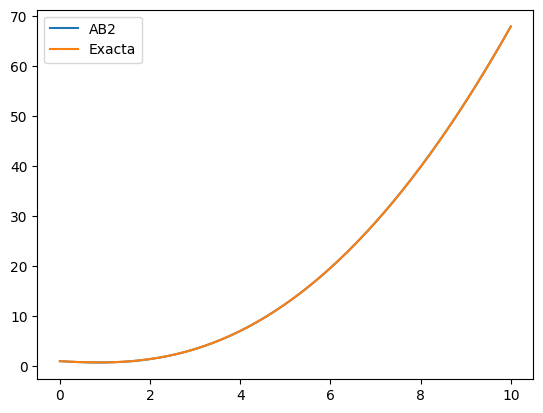

In [17]:
t, y = ab2(0, 10, f, 50, 1)
y_exacta = exacta_p1(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["AB2", "Exacta"])
show()

## Método de Euler para sistemas
Sea $n \geq 2$, sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R}^n \to \mathbb{R}^n$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
z' = f(t, z), & t \in [a, b], \\
z(0) = z_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Euler se define como
$$\begin{cases}
z_0 = z(0), \\
z_{k+1} = z_k + hf(t_k, z_k), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [18]:
def euler_sistema(a, b, f, N, z0):
    h = (b-a)/N
    t = zeros(N+1)
    z = zeros((len(z0), N+1))
    t[0] = a
    z[:, 0] = z0

    for k in range(N):
        t[k+1] = t[k] + h
        z[:, k+1] = z[:, k] + h*f(t[k], z[:, k])
    
    return t, z

Aplicamos el método de Euler para sistemas al problema $(P_2)$ con $N = 50$.

Error: 0.6441842583124497


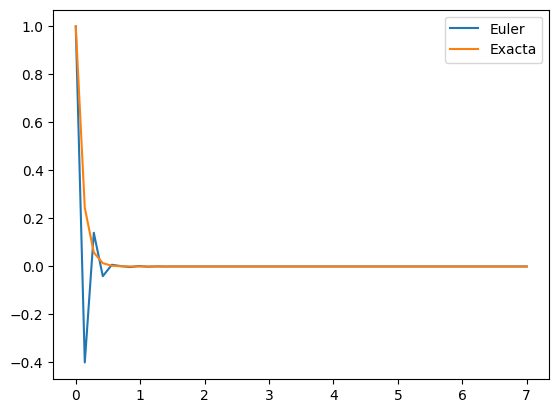

In [19]:
t, z = euler_sistema(0, 7, g, 50, array([1, -10]))
y = z[0]
y_exacta = exacta_p2(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Euler", "Exacta"])
show()

## Método de Heun para sistemas
Sea $n \geq 2$, sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R}^n \to \mathbb{R}^n$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
z' = f(t, z), & t \in [a, b], \\
z(0) = z_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Heun se define como
$$\begin{cases}
z_0 = z(0), \\
z_{k+1} = z_k + \frac{h}{2}(f(t_k, z_k) + f(t_{k+1}, z_k + hf(t_k, z_k))), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [20]:
def heun_sistema(a, b, f, N, z0):    
    h = (b-a)/N
    t = zeros(N+1)
    z = zeros((len(z0), N+1))
    t[0] = a
    z[:, 0] = z0

    for k in range(N):
        t[k+1] = t[k] + h
        z[:, k+1] = z[:, k] + h/2 * (f(t[k], z[:, k]) + f(t[k+1], z[:, k] + h*f(t[k], z[:, k])) )
    
    return t, z

Aplicamos el método de Heun para sistemas al problema $(P_2)$ con $N = 50$.

Error: 0.32601574168755043


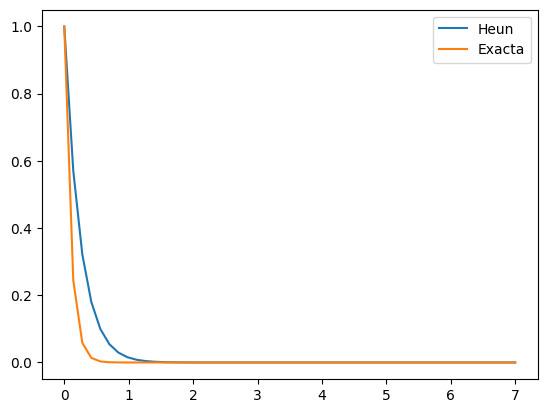

In [21]:
t, z = heun_sistema(0, 7, g, 50, array([1, -10]))
y = z[0]
y_exacta = exacta_p2(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Heun", "Exacta"])
show()

## Método del punto medio para sistemas
Sea $n \geq 2$, sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R}^n \to \mathbb{R}^n$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
z' = f(t, z), & t \in [a, b], \\
z(0) = z_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método del punto medio se define como
$$\begin{cases}
z_0 = z(0), \\
z_{k+1} = z_k + hf\left(t_k + \frac{h}{2}, z_k + \frac{h}{2}f(t_k, z_k)\right), & k = 0, 1, 2, \dots N-1.
\end{cases}$$

In [22]:
def punto_medio_sistema(a, b, f, N, z0):    
    h = (b-a)/N
    t = zeros(N+1)
    z = zeros((len(z0), N+1))
    t[0] = a
    z[:, 0] = z0

    for k in range(N):
        t[k+1] = t[k] + h
        z[:, k+1] = z[:, k] + h*f(t[k] + h/2, z[:, k] + h/2*f(t[k], z[:, k]))
    
    return t, z

Aplicamos el método del punto medio para sistemas al problema $(P_2)$ con $N = 50$.

Error: 0.32601574168755043


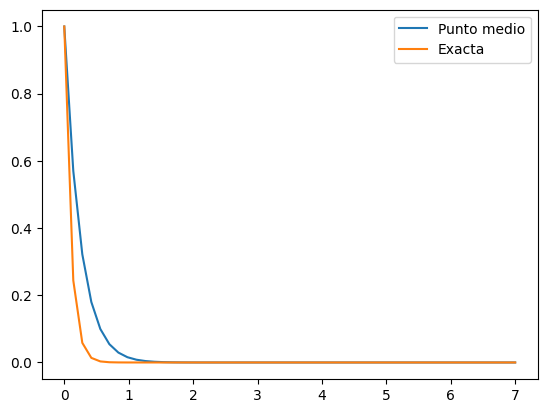

In [23]:
t, z = punto_medio_sistema(0, 7, g, 50, array([1, -10]))
y = z[0]
y_exacta = exacta_p2(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["Punto medio", "Exacta"])
show()

## Método RK4 para sistemas
Sea $n \geq 2$, sea $[a, b]$ un intervalo y sea $f: [a, b] \times \mathbb{R}^n \to \mathbb{R}^n$ continua.
Consideramos el problema de valor inicial
$$(P) \begin{cases}
z' = f(t, z), & t \in [a, b], \\
z(0) = z_0.
\end{cases}$$
Sea $\{t_0 = a, t_1, t_2, \dots, t_N = b\}$ una discretización uniforme de $[a, b]$ y sea $h = \frac{b-a}{N}$ el paso de malla.

El método de Runge-Kutta de cuarto orden se define como
$$\begin{cases}
z_0 = z(0), \\
z_{k+1} = z_k + \frac{h}{6}\,(K_1 + 2\,K_2 + 2\,K_3 + K_4), & k = 0, 1, 2, \dots N-1,
\end{cases}$$
donde
\begin{align*}
K_1 & = f(t_k, z_k), \\
K_2 & = f\left(t_k + \frac{h}{2}, z_k + \frac{h}{2}K_1\right), \\
K_3 & = f\left(t_k + \frac{h}{2}, z_k + \frac{h}{2}K_2\right), \\
K_4 & = f(t_{k+1}, z_k + hK_3).
\end{align*}

In [24]:
def rk4_sistema(a, b, f, N, z0):
    h = (b-a)/N
    t = zeros(N+1)
    z = zeros((len(z0), N+1))
    t[0] = a 
    z[:, 0] = z0

    for k in range(N):
        t[k+1] = t[k]+h
        k1 = f(t[k], z[:, k])
        k2 = f(t[k] + h/2, z[:, k] + h/2 *k1)
        k3 = f(t[k] + h/2*h, z[:, k] + h/2 *k2)
        k4 = f(t[k+1], z[:, k] + h*k3)
        z[:, k+1] = z[:, k] + h/6 *(k1 + 2*k2 + 2*k3 + k4)
    
    return t, z

Aplicamos el método RK4 para sistemas al problema $(P_2)$ con $N = 50$.

Error: 0.032881081687550356


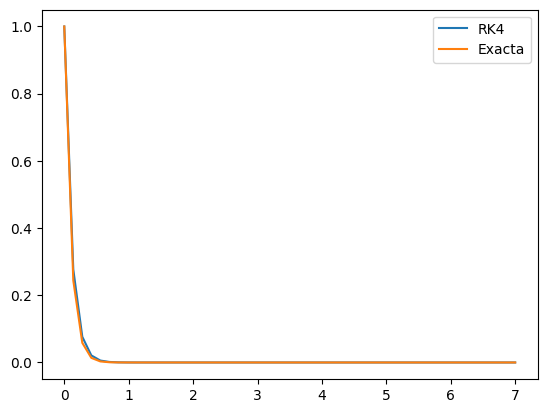

In [25]:
t, z = rk4_sistema(0, 7, g, 50, array([1, -10]))
y = z[0]
y_exacta = exacta_p2(t)

error = max(abs(y - y_exacta))
print("Error:", error)

plot(t, y)
plot(t, y_exacta)
legend(["RK4", "Exacta"])
show()